# DATA IMPORT AND INITIAL EXPLORATION

In [155]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
# Load the dataset
df = pd.read_csv('advertising data.csv')

# Display the first few rows of the dataframe
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# DATA INSPECTION

In [157]:
# Display the shape of the dataframe
df.shape

(200, 4)

In [158]:
# Display information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [159]:
# Check for duplicate rows
df.duplicated().sum()

0

# DATA VISUALIZATION

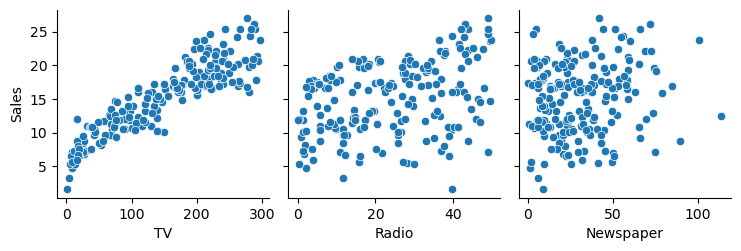

In [160]:
# Visualize the relationships between features and the target variable

sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], kind='scatter')
plt.show()

# DEFINE FEATURES AND TARGET

In [161]:
# Define the feature and target variable
x = df[['TV']]
y = df['Sales']

In [162]:
# Display the feature
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [163]:
# Display the target variable
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

# TRAIN-TEST SPLIT

In [164]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# MODEL TRAINING (Linear Regression)

In [165]:
# Import the Linear Regression model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# Train the model on the training data
model.fit(X_train, Y_train)

LinearRegression()

In [166]:
# Display the model's coefficients
model.coef_

array([0.05483488])

In [167]:
# Display the model's intercept
model.intercept_

7.206554548173255

# MODEL PREDICTIONS

In [168]:
# Predict the target variable for the test data
Y_pred = model.predict(X_test)

# MODEL EVALUATION

In [169]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 5.179525402166653
R2 Score: 0.814855389208679


# RESULT VISUALIZATION

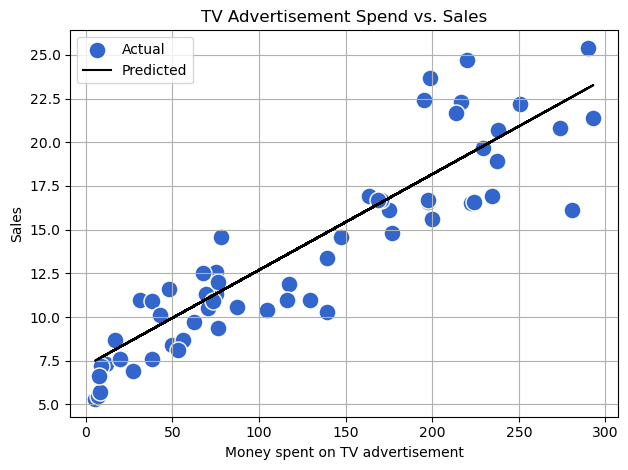

In [170]:
# Visualize the test results
plt.scatter(X_test, Y_test, color=(0.2, 0.4, 0.8), s=150, edgecolor='white', linewidth=1, label='Actual')
plt.plot(X_test, model.coef_[0]*X_test + model.intercept_, 'black', label='Predicted')
plt.xlabel('Money spent on TV advertisement')
plt.ylabel('Sales')
plt.title('TV Advertisement Spend vs. Sales')
plt.legend()  
plt.grid(True)
plt.tight_layout()
plt.show()